## EasyVisa Project
***Marks: 60***

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [2]:
visa = pd.read_csv(r'C:\Users\Niketh\Desktop\Great Learning\Module 5 Essemble Technique\Project\EasyVisa.csv')

In [3]:
# copying data to another variable
data = visa.copy()
df=data.copy()

## Overview of the Dataset

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail() 

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
data.shape

(25480, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are object interger and float data types

In [8]:
# checking for duplicate values
data.duplicated().sum() 

0

- There is no duplicated values

## Exploratory Data Analysis

####  summary of the data

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- On an average there 5667 employees in a company. There are outliers on either side. We can see minimum employees negative which has to be treated
- Most of the company was established in and around 1979.

#### Fixing the negative values in number of employees columns

In [10]:
data.loc[data.no_of_employees<0].shape 

(33, 12)

- There are 33 negative values in the employee column

In [11]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [12]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)


for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV16976    1
EZYV24321    1
EZYV4108     1
EZYV11463    1
EZYV7405     1
            ..
EZYV4015     1
EZYV19701    1
EZYV22398    1
EZYV17379    1
EZYV11359    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [13]:
# checking the number of unique values
data["case_id"].nunique()

25480

In [14]:
# Since all fields are unique droping the case_id column
data.drop(["case_id"], axis=1, inplace=True) 

### Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

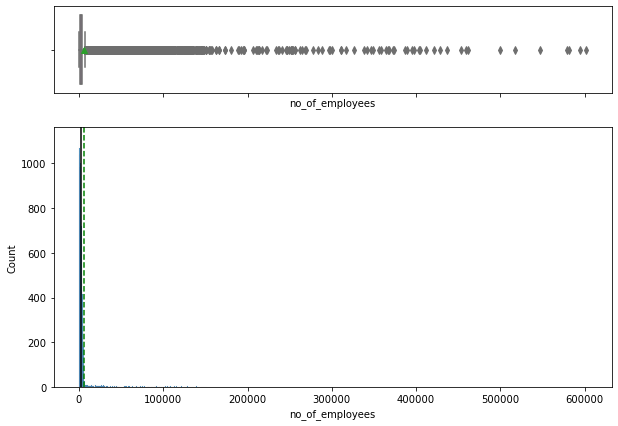

In [16]:
histogram_boxplot(data, "no_of_employees")

-Number of employees employed has a lot of outliers.

#### Observations on prevailing wage

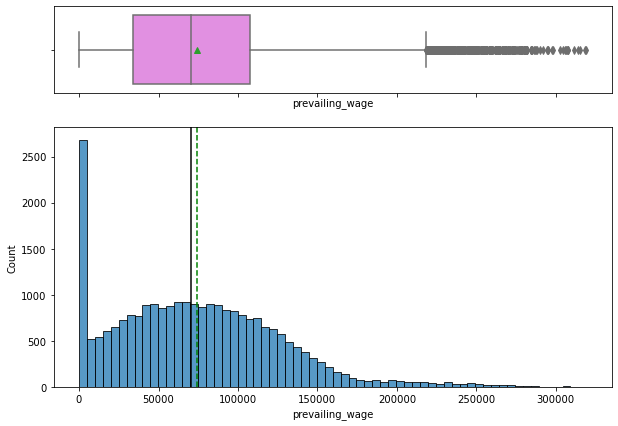

In [17]:
histogram_boxplot(data,'prevailing_wage') 

In [18]:
# checking the observations which have less than 100 prevailing wage
data.loc[data.prevailing_wage<100].head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified


In [19]:
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [20]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() 

Hour    176
Name: unit_of_wage, dtype: int64

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

#### Observations on continent

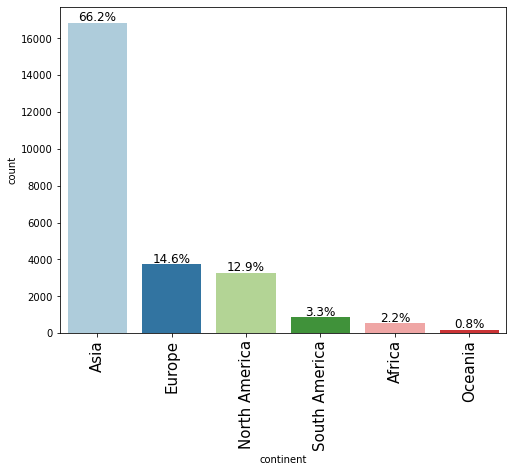

In [22]:
labeled_barplot(data, "continent", perc=True) 

- 66% of the employee are from Asia followed by Europe
- Less tham 1% of the employees are from Oceania

#### Observations on education of employee

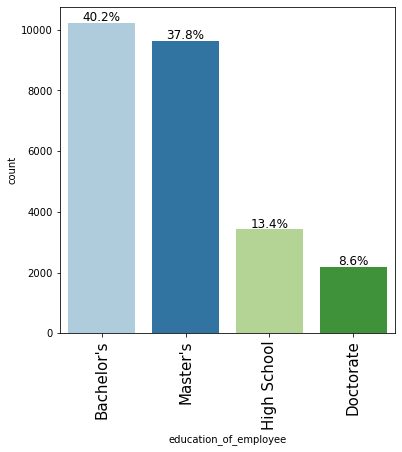

In [23]:
labeled_barplot(data, "education_of_employee", perc=True) 

- 40% of the employees hold a Bachelor's degree and 37.8 percent holds a Master's degree

#### Observations on job experience

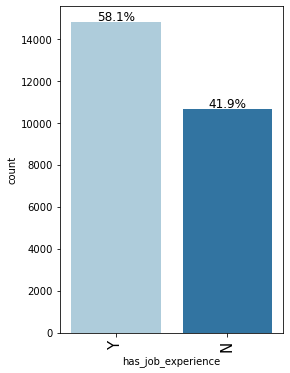

In [24]:
labeled_barplot(data, "has_job_experience", perc=True) 

- 58% of the employees are experienced

#### Observations on job training

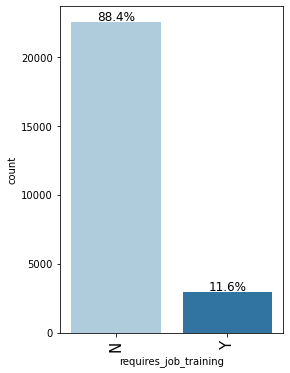

In [25]:
labeled_barplot(data, "requires_job_training", perc=True) 

- Even though onlu 58% of the employees are experienced,a job training is required only for 11.6% of employees

#### Observations on region of employment

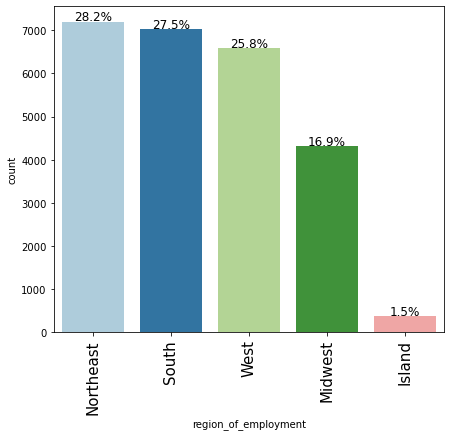

In [26]:
labeled_barplot(data, "region_of_employment", perc=True) 

- Most of hte woekers prefer Northeast then South followed by west US. However, Islands are the least preffered.

#### Observations on unit of wage

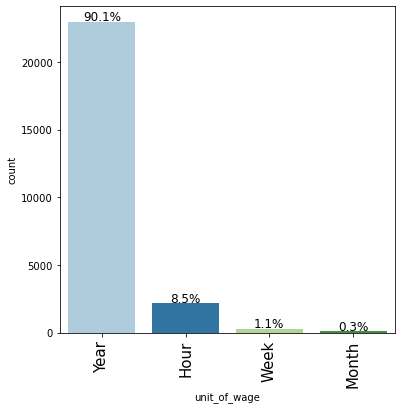

In [27]:
labeled_barplot(data, "unit_of_wage", perc=True) 

- Most of the employees are given their wages on yearly baisis

#### Observations on case status

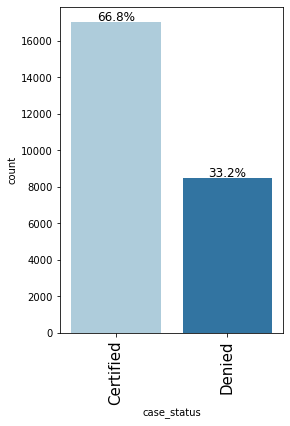

In [28]:
labeled_barplot(data, "case_status", perc=True)

- Of the total people applied 66.8% of them were certified.

### Bivariate Analysis

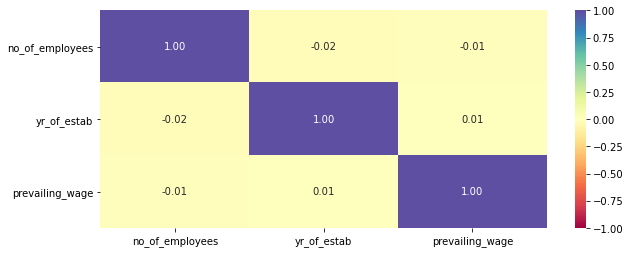

In [29]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 4))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There is no corelation between year of establishment, prevailing wage and number of employees.

**Creating functions that will help us with further analysis.**

In [30]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [31]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Impact of education on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


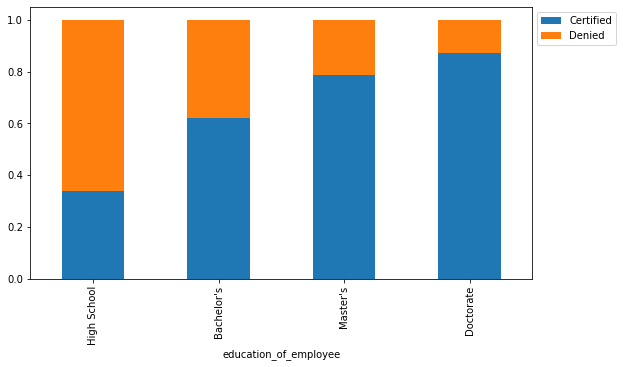

In [32]:
stacked_barplot(data, "education_of_employee", "case_status")

- Most of the Denied employees were having only high School as the highest educational qualification
- If the employee has Doctrate as the highest qualification then chances of getting ceritified is on the higher side.

#### Region vs Educational background

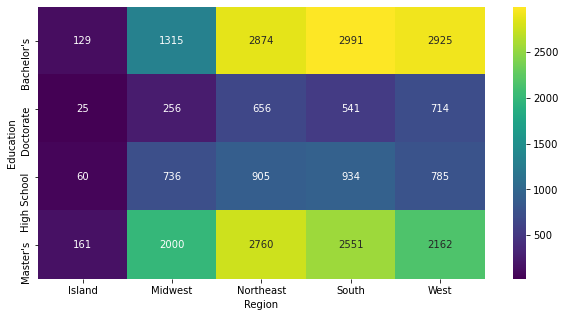

In [33]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data.education_of_employee,data.region_of_employment),
    annot=True,
    fmt="g",
    cmap="viridis"
) 

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

- Island is the least prefered area by employees of all educational qualification

#### Percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


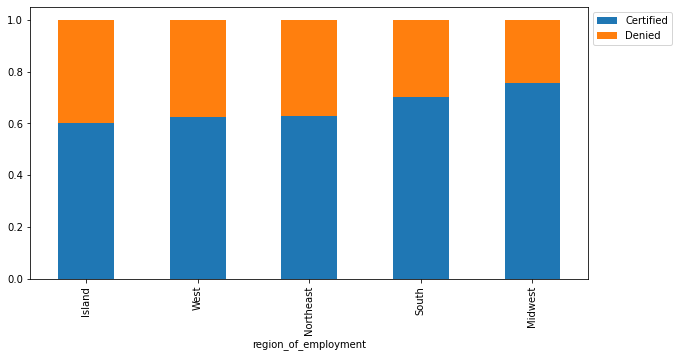

In [34]:
stacked_barplot(data, "region_of_employment", "case_status")

- Most number of deniel is in case of islands
- Midwest is the region where most of the emoloyees are getting certified

#### Visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


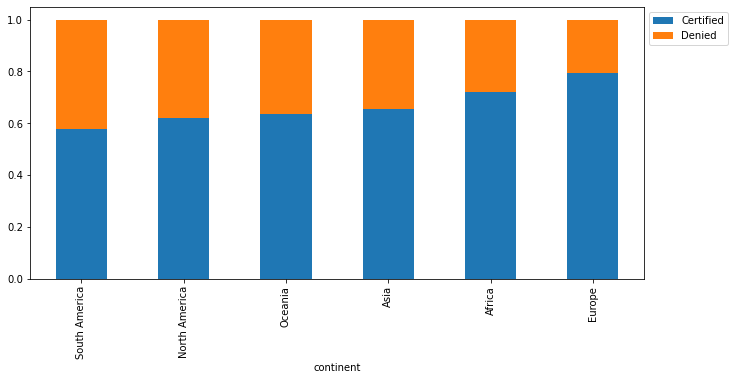

In [35]:
stacked_barplot(data, "continent", "case_status")

- Europeans are getting more certified and South Americans are getiing denied the most

#### Work experience influence over visa certification 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


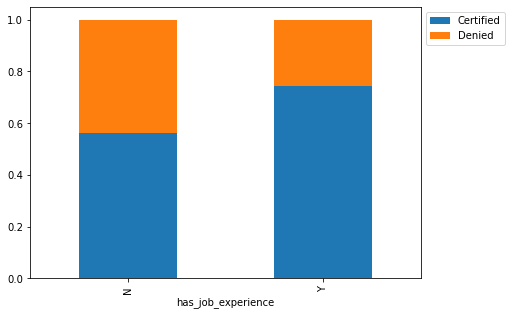

In [36]:
stacked_barplot(data, "has_job_experience", "case_status")

- Experienced people have a better chance of getting approved

#### Job training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


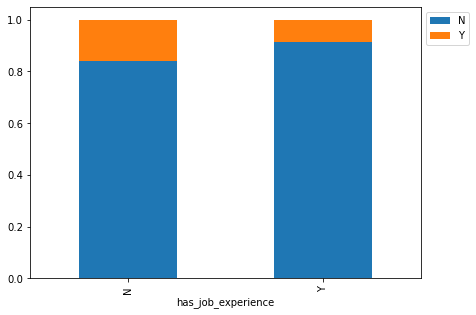

In [37]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

- It is clear from the plot that employee with job experience require less training. However, even the employee without experiece doesnt need much training.

####  Visa status vs prevailing wage

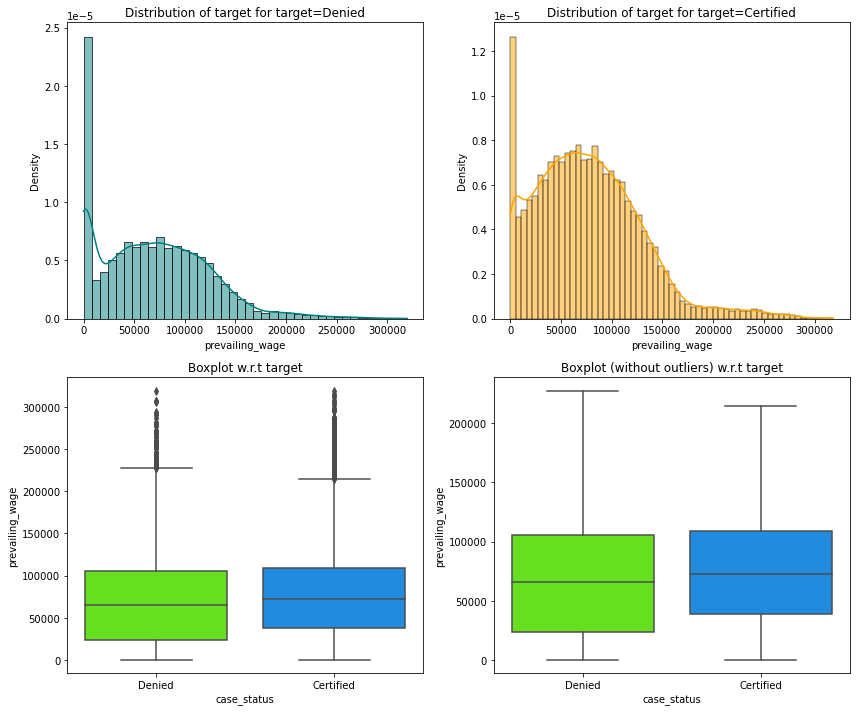

In [38]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

- Prevailing wage for certified employees is slighly more than the denied employees

#### Checking if the prevailing wage is similar across all the regions of the US

<AxesSubplot:xlabel='region_of_employment', ylabel='prevailing_wage'>

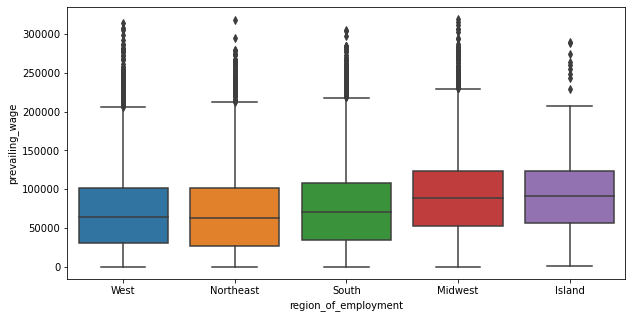

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage')

- THe median previlege wage is slightly high in Midwest and Island

#### Prevailing wage  impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


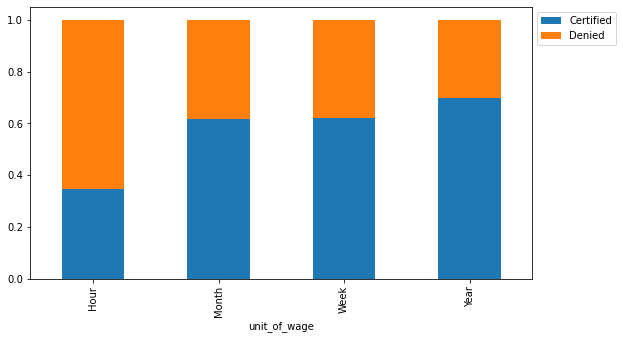

In [40]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Most number of cases are rejected when unit of wage is in hours and most accepted when it is year wise

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

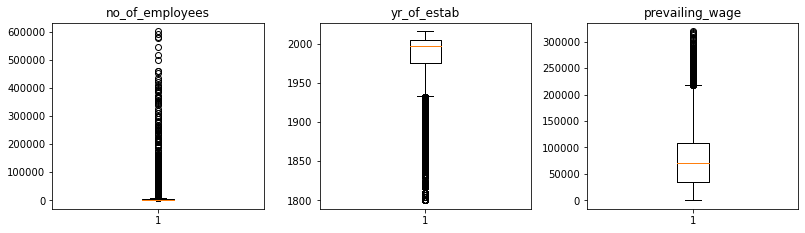

In [41]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- There are outliers in the data
- However, we will not treat the data

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [42]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1)
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [43]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

In [44]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [45]:
model = DecisionTreeClassifier(random_state=1) 
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

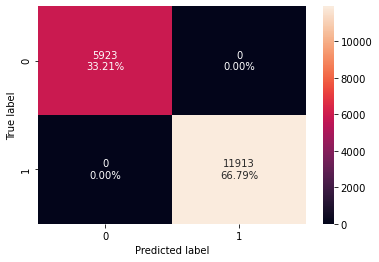

In [48]:
confusion_matrix_sklearn(model , X_train, y_train)  

- Training data has no false negative and no false positive i.e it indicaties overfitting of the data

In [49]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

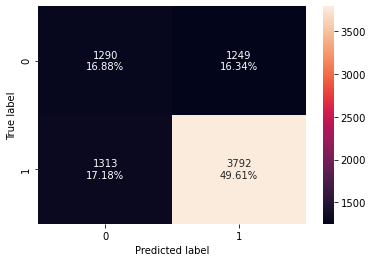

In [50]:
confusion_matrix_sklearn(model, X_test, y_test) 

In [51]:
decision_tree_perf_test = model_performance_classification_sklearn( 
    model, X_test, y_test) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


### Hyperparameter Tuning - Decision Tree

In [52]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

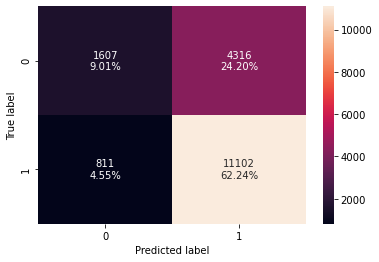

In [53]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) 

In [54]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


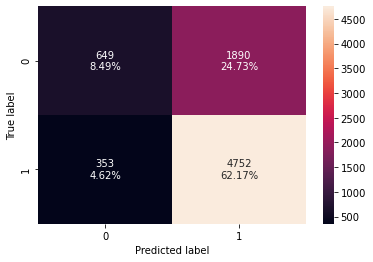

In [55]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [56]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) 
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [57]:
bagging_classifier =BaggingClassifier(random_state=1) 
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

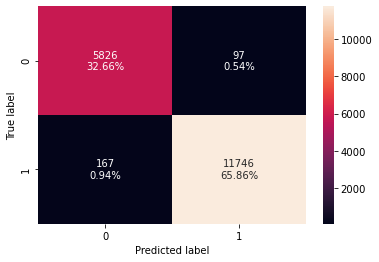

In [58]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train) 

In [59]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train) 
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

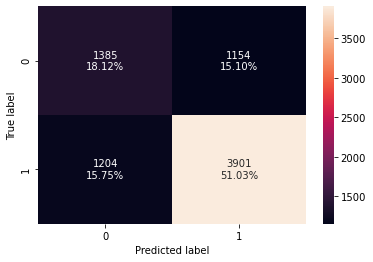

In [60]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test) 

In [61]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) 
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


### Hyperparameter Tuning - Bagging Classifier

In [62]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

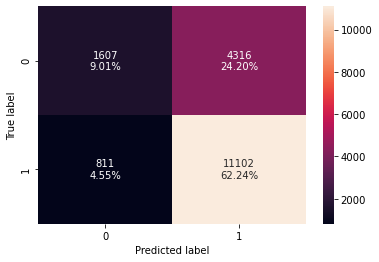

In [63]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [64]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance \n",bagging_estimator_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


#### Checking model performance on test set

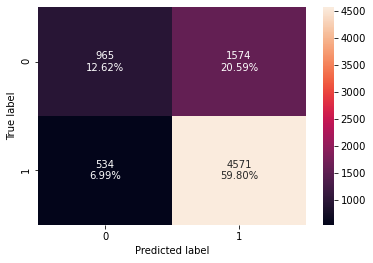

In [65]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test,y_test)

In [66]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test) 
print("Testing performance \n",bagging_estimator_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


### Random Forest

In [67]:
# Fitting the model
rf_estimator = RandomForestClassifier(class_weight='balanced',random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

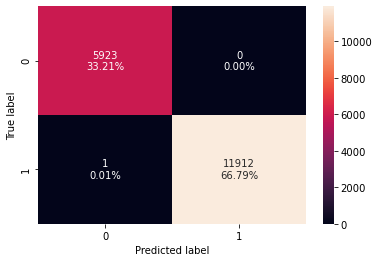

In [68]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [69]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


#### Checking model performance on test set

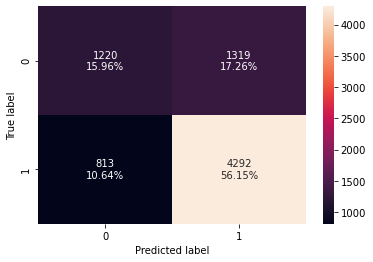

In [70]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [71]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721088  0.840744   0.764926  0.801045


### Hyperparameter Tuning - Random Forest

In [72]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj =GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs = -1) 
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=5,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance on training set

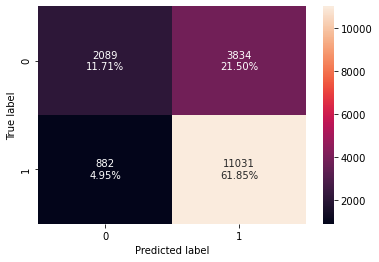

In [73]:
confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [74]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.735591  0.925963   0.742079  0.823885


#### Checking model performance on test set

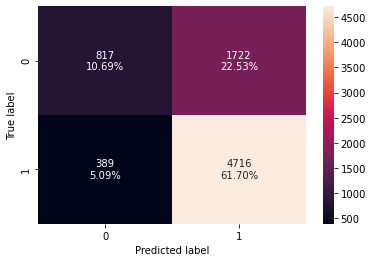

In [75]:
confusion_matrix_sklearn(rf_tuned, X_test,y_test) 

In [76]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) 
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.723836  0.9238   0.732526  0.817119


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1) 
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

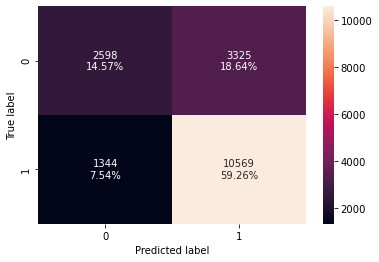

In [78]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [79]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train) 
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

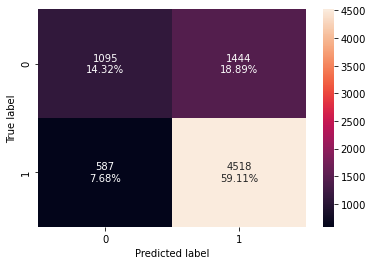

In [80]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [81]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


### Hyperparameter Tuning - AdaBoost Classifier

In [82]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5) 
grid_obj = grid_obj.fit(X_train, y_train)


abc_tuned = grid_obj.best_estimator_


abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

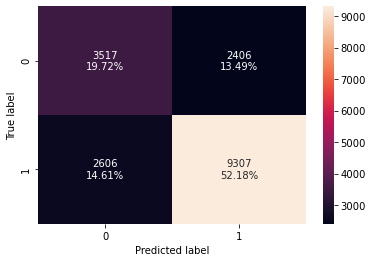

In [83]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [84]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking model performance on test set

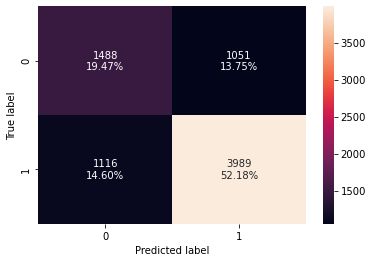

In [85]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [86]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) 
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


### Gradient Boosting Classifier

In [87]:
gb_classifier = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gb_classifier.fit(X_train,y_train) 

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

#### Checking model performance on training set

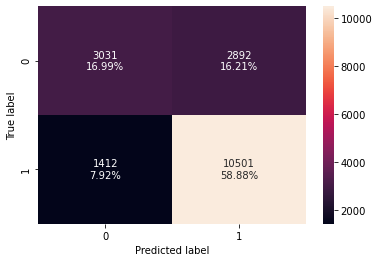

In [88]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [89]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922


#### Checking model performance on test set

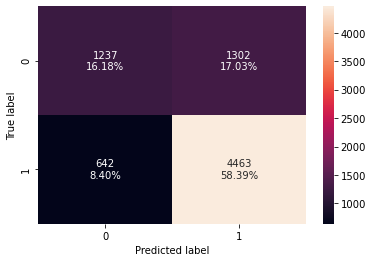

In [90]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [91]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159


### Hyperparameter Tuning - Gradient Boosting Classifier

In [92]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5) 
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

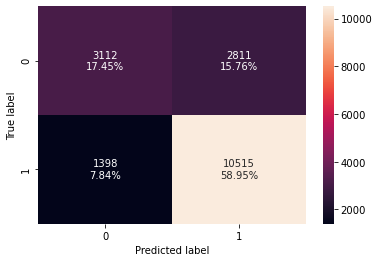

In [93]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train) 

In [94]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set

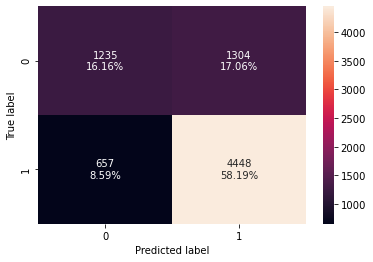

In [95]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [96]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [97]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_classifier.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

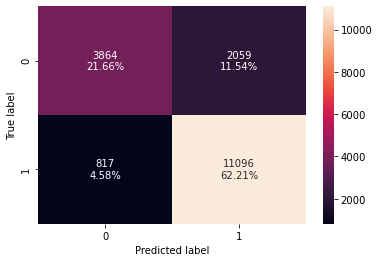

In [98]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [99]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


#### Checking model performance on test set

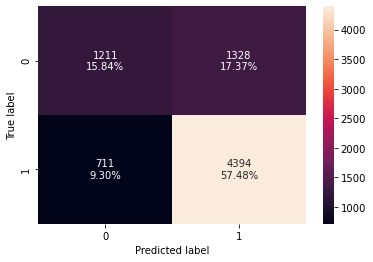

In [100]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [101]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


### Hyperparameter Tuning - XGBoost Classifier

In [102]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5) 
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

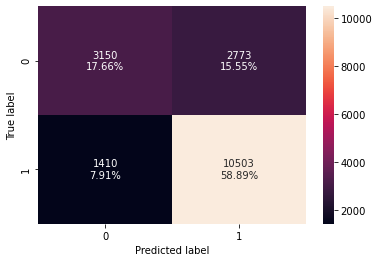

In [103]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train) 

In [104]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765474,0.881642,0.791127,0.833935


#### Checking model performance on test set

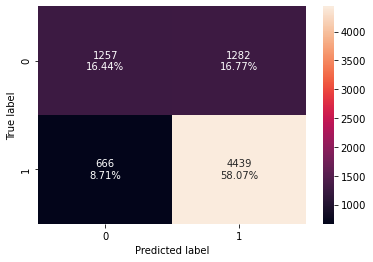

In [105]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [112]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test) 
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


## Stacking Classifier

In [114]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier =StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

stacking_classifier.fit(X_train,y_train) 

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       n_estimators=20,
                                                       oob_score...
                             

### Checking model performance on training set

In [ ]:
X_train.head()

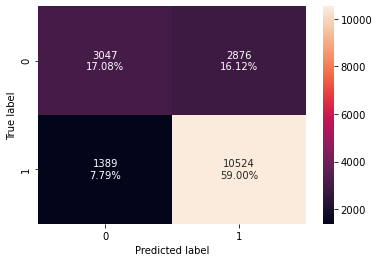

In [115]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train) 

In [116]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.760877,0.883405,0.785373,0.83151


### Checking model performance on test set

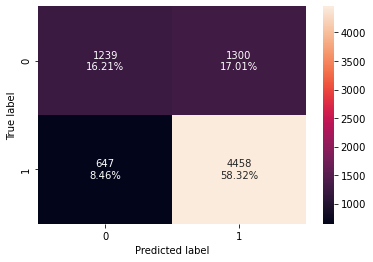

In [117]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [118]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) 
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74529,0.873262,0.774227,0.820768


## Model Performance Comparison and Final Model Selection

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.735591,0.738226,0.718995,0.758690,0.764017,0.838753,0.765474,0.760877
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.925963,0.887182,0.781247,0.881474,0.882649,0.931419,0.881642,0.883405
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.742079,0.760688,0.794587,0.784066,0.789059,0.843482,0.791127,0.785373
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.823885,0.819080,0.787861,0.829922,0.833234,0.885272,0.833935,0.831510


In [120]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df 



Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.721088,0.723836,0.734301,0.716510,0.745683,0.743459,0.733255,0.745160,0.745290
Recall,0.742801,0.930852,0.764153,0.895397,0.840744,0.923800,0.885015,0.781391,0.874241,0.871303,0.860725,0.869540,0.873262
Precision,0.752232,0.715447,0.771711,0.743857,0.764926,0.732526,0.757799,0.791468,0.774154,0.773296,0.767913,0.775913,0.774227
F1,0.747487,0.809058,0.767913,0.812622,0.801045,0.817119,0.816481,0.786397,0.821159,0.819379,0.811675,0.820063,0.820768


- Gradient Boost Classifier, XGBoost Classifier tuned and Stacking Classifier are the best models as they have highest F1 score of around 82%.

### Important features of the final model

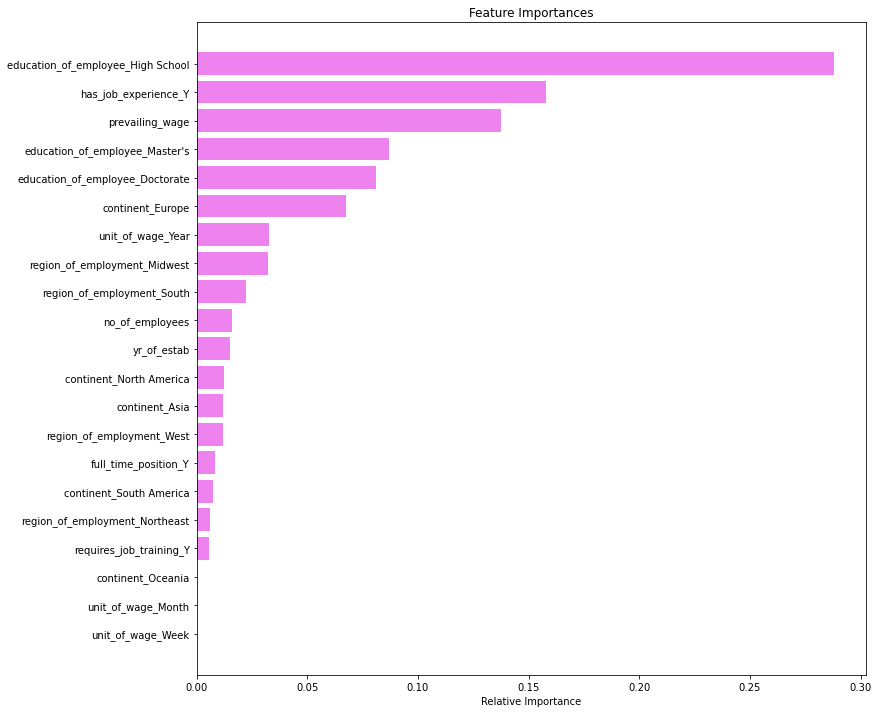

In [121]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Education of the employee in High school in the major feature that determines certification of the visa followed by people who are having a job experience

## Business Insights and Recommendations

- We can use this predictive model for any for people with any eduactional qualification and experice to ceritify or deny visa for an applicant
- Educational qualification is one of the key parameter in certifying visa. People with higher qualification are mostly certified.
- As the number applicants to Islands is less and the deniel rate is more there is chance that there could be shortage of employement. The mean prevailing wage is also higher here compared to other places.
- Job experience is an important feature. People who has the experience can adapt and work with the situation much more faster.
- Even though 66% appliacations comes from Asians Europeans are certified the most followed by South Americans and then the asains.
- Most of the employee with MAsters as their qualifiaction are looking to find job in West as they have a similar prevailing wage of Islands.
- Even though people with no experience requires less training they can be also considered for granting visa. Especially in the regions where application is less.
- It is better to have a uniform unit for wage for all the employees.
- West is a region where prevailing wage is comparitivley less and people with educational qualification Master and Bachelors are preferring the most.The denial rate is also comparitvely more in West
- More Visas can be certified in the areas of West, South and Northeast region as majoirty of employees who apply are of Masters and Graduate education qualification.






___